# Introduction

The prediction of future global temperatures is a critical aspect of climate research and policy-making. By accurately forecasting temperature trends, we can gain valuable insights into the potential impacts of climate change and make informed decisions to mitigate its effects. In this study, we explore the use of ARIMA (Autoregressive Integrated Moving Average) and SARIMA (Seasonal ARIMA) models to forecast global temperature values based solely on historical temperature data.

The dataset used in this analysis is sourced from Berkeley Earth, an organization affiliated with Lawrence Berkeley National Laboratory. This dataset provides comprehensive and reliable surface temperature measurements from various locations across the globe. The data can be accessed from the following Kaggle repository: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data.

The primary objective of this study is to investigate the effectiveness of ARIMA and SARIMA models in capturing the temporal patterns and predicting future global temperature changes. These models are well-suited for time series analysis, as they can account for the autocorrelation and seasonality present in the temperature data.

By leveraging the historical temperature observations, we aim to develop accurate and robust forecasting models. The insights gained from these models can help us understand the long-term temperature trends, identify potential climate anomalies, and assess the efficacy of climate change mitigation strategies.

# EDA

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [49]:
# Importing dataset
data = pd.read_csv('/home/veroastro/Documents/Forecasting_globla_temp/data/GlobalTemperatures.csv')
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Checking types of data in each column. 
data.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [4]:
#changing the date column,dt, into a datetime object
data['dt']=pd.to_datetime(data['dt'])
data.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
dtype: object

In [5]:
#checking for missing values.
na = data.isna()
na.sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [6]:
# Checking the dates of the na values. 
for n in range(0,len(data['dt'])):
    if na['LandAverageTemperature'][n] == True :
        print(data['dt'][n])
    if na['LandAverageTemperatureUncertainty'][n] == True :
        print(data['dt'][n])

1750-11-01 00:00:00
1750-11-01 00:00:00
1751-05-01 00:00:00
1751-05-01 00:00:00
1751-07-01 00:00:00
1751-07-01 00:00:00
1751-10-01 00:00:00
1751-10-01 00:00:00
1751-11-01 00:00:00
1751-11-01 00:00:00
1751-12-01 00:00:00
1751-12-01 00:00:00
1752-02-01 00:00:00
1752-02-01 00:00:00
1752-05-01 00:00:00
1752-05-01 00:00:00
1752-06-01 00:00:00
1752-06-01 00:00:00
1752-07-01 00:00:00
1752-07-01 00:00:00
1752-08-01 00:00:00
1752-08-01 00:00:00
1752-09-01 00:00:00
1752-09-01 00:00:00


For this study. I am only interested in the land average temperatures and its uncertainties from the dataset. I decided to remove them from the study, since I am going to average the temperatures over the years. 

In [7]:
# creating dataset with the relevant columns and 
    # deleting the missing values
cols = ['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty']
land_avg_temp = data[cols].dropna()
land_avg_temp.isna().sum()

dt                                   0
LandAverageTemperature               0
LandAverageTemperatureUncertainty    0
dtype: int64

In [8]:
# creating the dataset of temperatures by year
land_avg_temp['years'] = pd.DatetimeIndex(land_avg_temp['dt']).year
yearly = land_avg_temp.groupby('years').mean()
print(yearly.describe())


       LandAverageTemperature  LandAverageTemperatureUncertainty
count              266.000000                         266.000000
mean                 8.369337                           0.945719
std                  0.584921                           0.994110
min                  5.779833                           0.062083
25%                  8.081563                           0.210208
50%                  8.372167                           0.405583
75%                  8.704167                           1.629563
max                  9.831000                           4.026000


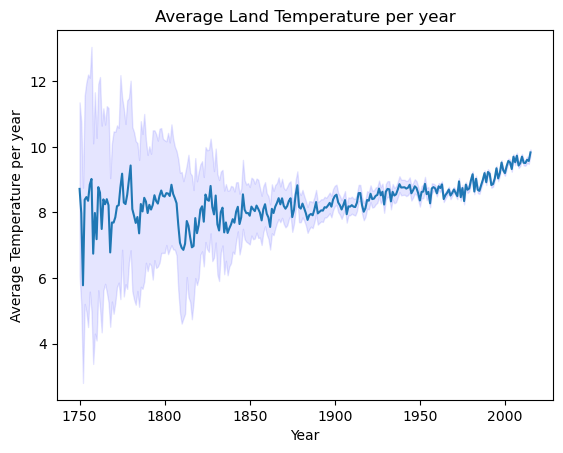

In [9]:
y = yearly['LandAverageTemperature']
unc = yearly['LandAverageTemperatureUncertainty']
yearly.index
plt.plot(y)
plt.fill_between(yearly.index,y+unc,y-unc,alpha=0.1, color='b' )
plt.title("Average Land Temperature per year")
plt.xlabel("Year")
plt.ylabel("Average Temperature per year")
plt.show()

In [10]:
yearly.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty
count,266.000000,266.000000
mean,8.369337,0.945719
std,0.584921,0.994110
min,5.779833,0.062083
25%,8.081563,0.210208
50%,8.372167,0.405583
75%,8.704167,1.629563
max,9.831000,4.026000


It is visible that the errors before about the year 1850 are very high in the previous image. From the table above, the max error is 4 degrees celcius with a interquartile of 75% of 1.63. This introduces to much noise to the analysis so I decided to remove them. 

In [11]:
# Creating the dataset with only the temperatures and 
# dropping first 100 elements to reduce errors.
avg_temp = yearly['LandAverageTemperature'].drop(yearly.index[:100])
avg_temp.describe()

count    166.000000
mean       8.571583
std        0.473687
min        7.558583
25%        8.195708
50%        8.540750
75%        8.791250
max        9.831000
Name: LandAverageTemperature, dtype: float64

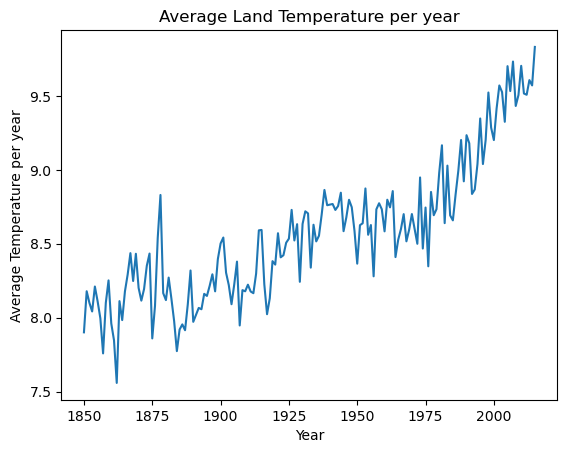

In [12]:
# Plotting the new dataset
y = avg_temp
plt.plot(y)
plt.title("Average Land Temperature per year")
plt.xlabel("Year")
plt.ylabel("Average Temperature per year")
plt.show()


There is less sharp variations on the temperatures. Also the temperature seems to sharply increase since about 1960 of about 1 degree celsius. 

# Analysis

## Data Preprocessing

In [13]:
# splitting the dataset into train and test datasets
size = len(avg_temp)
cutoff = int(size*0.7)
train = avg_temp[:cutoff]
test = avg_temp[cutoff:]
print('train:', train.shape)
print('test:', test.shape)
print('Cut-off year =', 1850+train.shape[0])

train: (116,)
test: (50,)
Cut-off year = 1966


In [16]:
from pmdarima.arima.stationarity import ADFTest
# Test whether we should difference at the alpha=0.05 significance level
adf_test = ADFTest(alpha=0.05)
p_val, should_diff= adf_test.should_diff(avg_temp) 

print('pval', p_val)
print(should_diff)


pval 0.45855212965288394
True


The p-value is more than the significance level of 0.05 which means that the time series is not stationary. The should_diff is true which means that there is a need to differenciate the time series to achieve stationarity.

## Building Model

In this study, I will be using the ARIMA model, which stands for AutoRegresive Integratated Moving Averages. Auto regressive means it shows a changing variable that regresses on its own prior or lagged values (predicts future values based on past values). Integrated means it observes the difference between static data values and previous values in order to achieve stationarity. Moving Average which is the dependency between an observed value and a residual error from a moving average model applied to previous observations.

The model has three component functions: AR (p), the number of lag observations or autoregressive terms in the model; I (d), the difference in the nonseasonal observations; and MA (q), the size of the moving average window. In order to find the values of the three components, I use pmdarima's auto_arima which finds the best values for p,d and q.  In order to find the best values of p and q, auto-ARIMA optimizes for a given information_criterion. In this study we use the default AIC value(Akaike Information Criterion) which is a mathematical method for evaluating how well a model fits the data it was generated from. 

In [17]:
# calculating the differencing order to use in the model
import pmdarima as pm
print('Differencing order')
print('d =', pm.arima.ndiffs(avg_temp))

Differencing order
d = 1


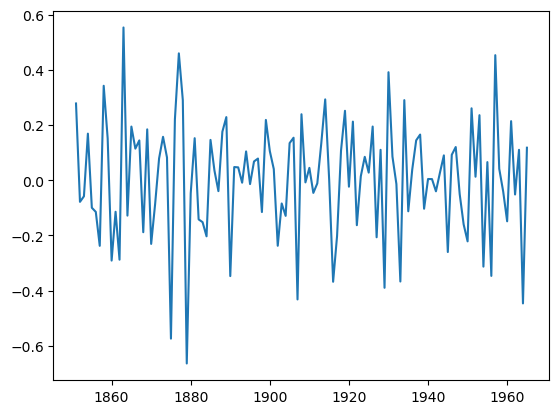

In [18]:
# Plotting the differenced data
plt.plot(train.diff())

From the plot above, the trend of the dataset has been removed.

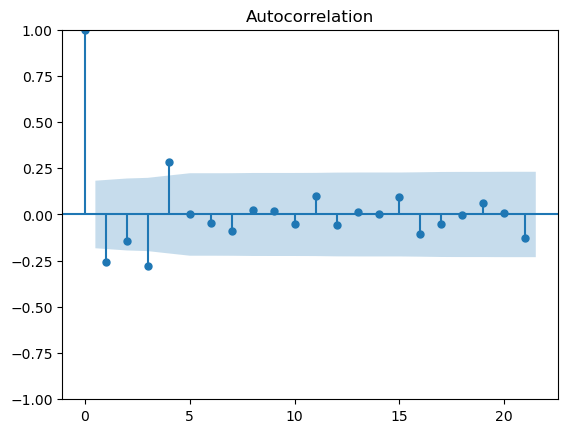

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
# Plots ACF
plot_acf(train.diff().dropna())
plt.show()

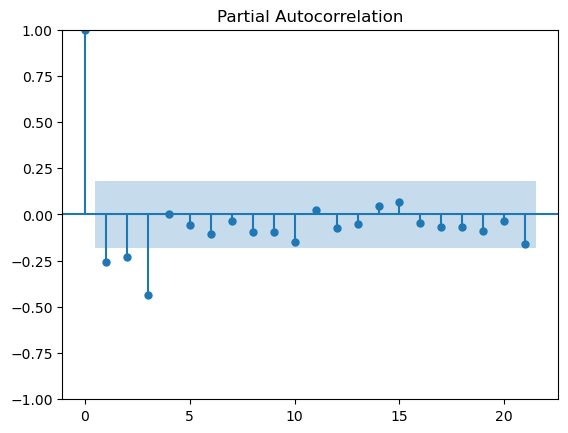

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf
# Plots PCAF
plot_pacf(train.diff().dropna(),method='ywm')
plt.show()

The ACF and PACF show there is the auroregressive compontent and moving average component.

### Auto Arima

In [40]:
# auto-ARIMA
model = pm.auto_arima(train, start_p=1, start_q=1,
                         max_p=10, max_q=10,
                         seasonal=False,
                         d=1, trace=True,  
                         suppress_warnings=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-26.696, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-32.798, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-47.914, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-28.620, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-55.154, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-57.500, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-60.868, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-59.148, Time=0.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-59.193, Time=0.33 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-60.214, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-57.208, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-58.979, Time=0.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  116
Model:               SARIMAX(1, 1, 3)   Log Likelihood                  36.434
Date:                Mon, 15 May 2023   AIC                            -60.868
Time:                        09:30:15   BIC                            -44.399
Sample:                             0   HQIC                           -54.183
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0102      0.002      4.983      0.000       0.006       0.014
ar.L1         -0.5677      0.196     -2.894      0.004      -0.952      -0.183
ma.L1          0.0894      0.194      0.461      0.645      -0.291       0.470
ma.L2         -0.5620      0.137     -4.102      0.000      -0.831      -0.293
ma.L3         -0.4949      0.102     -4.843      0.000      -0.695      -0.295
sigma2         0.0304      0.005      6.395      0.000       0.021       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.74
Prob(Q):                              0.93   Prob(JB):                         0.25
Heteroskedasticity (H):               0.57   Skew:                            -0.35
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The values of AIC, BIC(Bayesian Information Criterion), and HQIC(Hannan-Quinn Information Criterion) are low which indicates a good fit of the model. 
The P>|z|(p-values associated with the z-values or the number or standar deviations a coefficient is away from zero) is also very low, except for MA L1 coefficient, which indicates a statistical significance of the coefficients. 
The Ljung-Box value means that the residuals from the ARIMA model could be autocorrelated.
The Jarque-Bera (JB)value which is a test of the residuals' skewness and kurtosis has a value higher than 0.05. This means that the residuals follow a normal distribution.

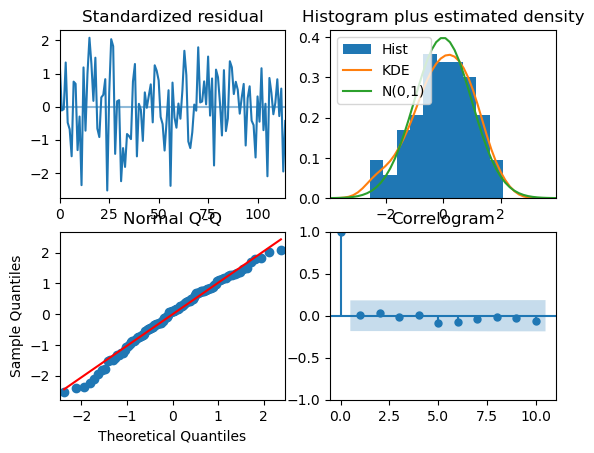

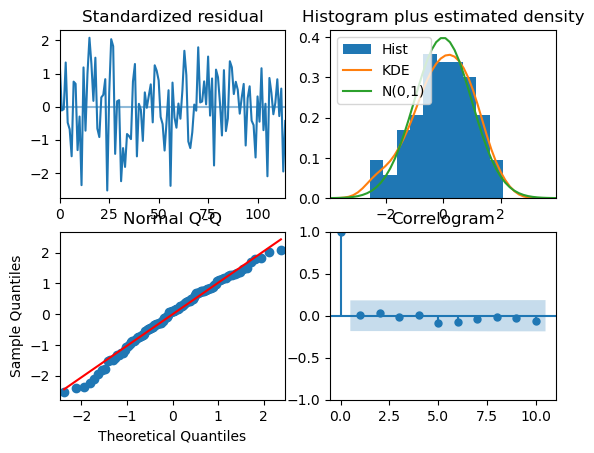

In [20]:
# Plot ARIMA’s diagnostics
model.plot_diagnostics()

The plots above show that the residuals follow a normal distribution and aren't correlated.

In [21]:
# Forecast
preds, conf_ints = model.predict(n_periods=test.shape[0], return_conf_int=True)


In [46]:
# Defining a function to plot the prediction and the actual test values
def plot_all(train,test,pred,conf_int):
    x_axis = np.arange(train.shape[0] + pred.shape[0])
    x_years = x_axis + 1850  # Year starts at 1850

    plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75, label='training')
    plt.plot(x_years[x_axis[train.shape[0]:]], pred, alpha=0.75, label='forecast')  # Forecasts
    plt.plot(x_years[x_axis[train.shape[0]:]], test,alpha=0.75, label='actual')  # Test data
    plt.fill_between(x_years[x_axis[-pred.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
    plt.title("Land Avg Temp forecasts - ARIMA")
    plt.xlabel("Year")
    plt.ylabel("Average Temperature per year")
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

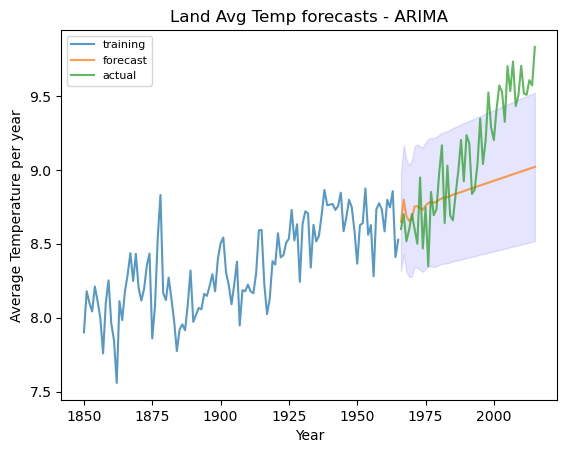

In [45]:
plot_all(train,test,preds,conf_ints)

In [24]:
#Calculate the mean absolute percentage

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

mape_70 = mape(test, preds)
print('MAPE', mape_70)

MAPE 0.033472774145071146


In [25]:
# Calculate the root meansquared error
from sklearn.metrics import mean_squared_error
def rmse(test, pred):
    return np.sqrt(mean_squared_error(test,pred))
rmse_70 = rmse(test, preds)
print('RMSE', rmse_70)

RMSE 0.3859841480454992


From the error metrics, the model seems to be doing a good job at predicting the values. But from the plot above, the model under predicts the values of temperatures.

### Seasonality

Visual inspection of the series shows no seasonality but the outocome of the previous model shows that the time series maybe to complex to accurately model and this could be due to seasonality. Here, I decompose the time series to check for it. 

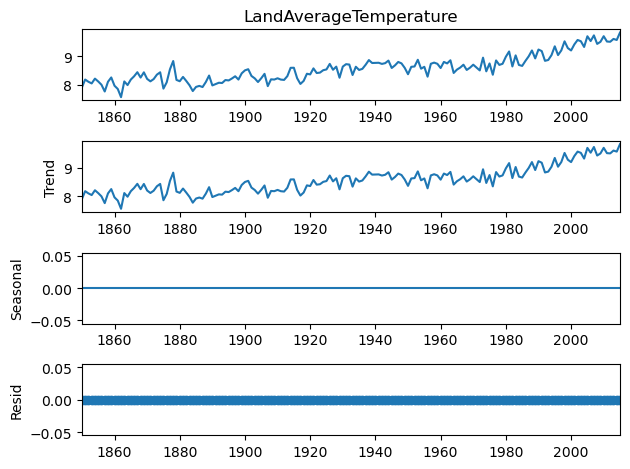

In [47]:
# Decomposing time series additive model
from statsmodels.tsa.seasonal import seasonal_decompose
# Set the index to datatimeindex
avg_temp.index = pd.to_datetime(avg_temp.index, format='%Y')
#seasonal decomposing
sd_add = seasonal_decompose(avg_temp, model='additive')
sd_add.plot()
plt.show()

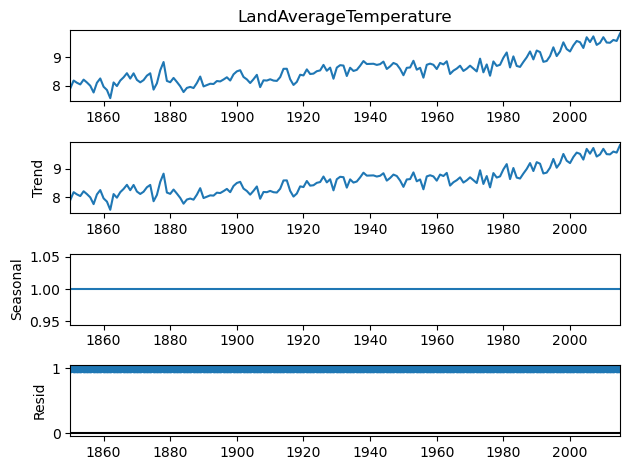

In [48]:
# Decomposing time series multiplicative model
sd_mul = seasonal_decompose(avg_temp, model='multiplicative')
sd_mul.plot()
plt.show()

Both models show no seasonal component.

## Changing cut-off values
### Cut-off at 1950

In [28]:
# splitting the dataset into train and test datasets with cut-off 1950
cutoff = 100 # year 1950
train_1950 = avg_temp[:cutoff]
test_1950 = avg_temp[cutoff:]
print('train:', train_1950.shape)
print('test:', test_1950.shape)
print('Cut-off year =', 1850+train_1950.shape[0])

train: (100,)
test: (66,)
Cut-off year = 1950


In [29]:
# auto-ARIMA
model_1950 = pm.auto_arima(train_1950, start_p=1, start_q=1,
                         max_p=10, max_q=10,
                         seasonal=False,
                         d=1, trace=True,  
                         suppress_warnings=True, 
                         stepwise=True)

model_1950.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-26.602, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-29.456, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-41.090, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-28.491, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-49.203, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-48.228, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-49.352, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-50.448, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-49.463, Time=0.27 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-49.193, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-50.517, Time=0.19 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-50.305, Time=0.25 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-49.761, Time=0.32 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=-49.815, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 4)   Log Likelihood                  31.258
Date:                Mon, 15 May 2023   AIC                            -50.517
Time:                        09:24:26   BIC                            -34.946
Sample:                             0   HQIC                           -44.217
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0074      0.003      2.228      0.026       0.001       0.014
ma.L1         -0.4154      0.110     -3.791      0.000      -0.630      -0.201
ma.L2         -0.3224      0.113     -2.841      0.004      -0.545      -0.100
ma.L3         -0.2710      0.095     -2.865      0.004      -0.456      -0.086
ma.L4          0.1679      0.093      1.810      0.070      -0.014       0.350
sigma2         0.0307      0.005      6.284      0.000       0.021       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.94
Prob(Q):                              0.82   Prob(JB):                         0.23
Heteroskedasticity (H):               0.46   Skew:                            -0.41
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The values of AIC, BIC, and HQIC are low which indicates a good fit of the model. 
The P>|z| is also very low accross all coeficients which indicates a statistical significance. 
The Ljung-Box value means that the residuals from the ARIMA model cannot say if there is autocorrelation.
The Jarque-Bera(JB) value has a value higher than 0.05. This means that the residuals follow a normal distribution.

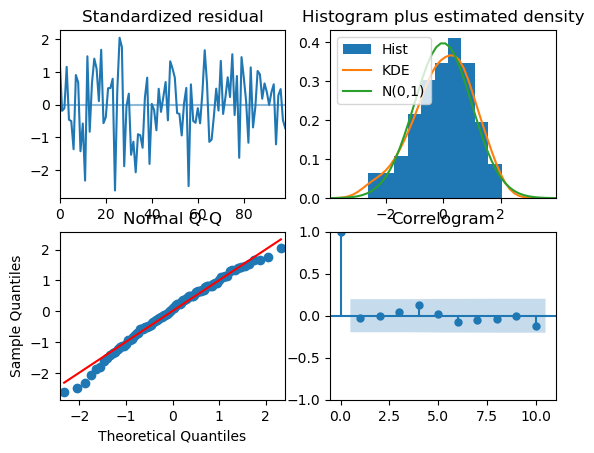

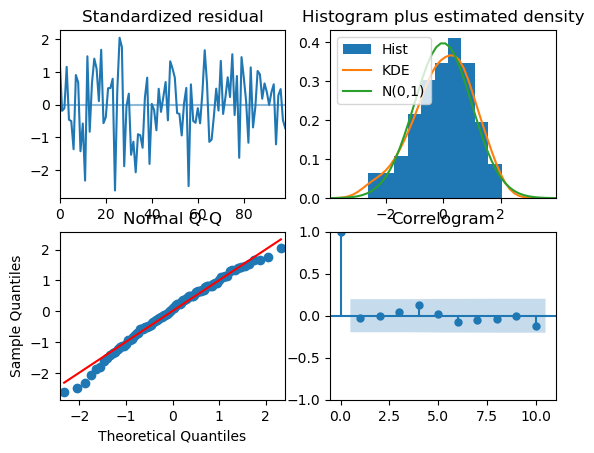

In [51]:
# Plot ARIMA’s diagnostics
model_1950.plot_diagnostics()

The plots above show that the residuals follow a normal distribution and aren't correlated.

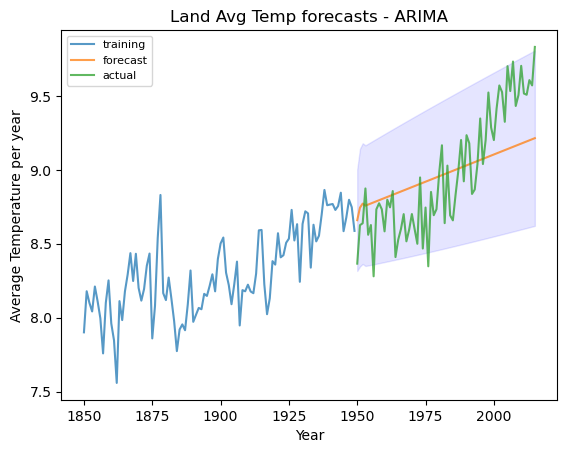

In [30]:
# Forecast
preds_1950, conf_int_1950 = model_1950.predict(n_periods=test_1950.shape[0], return_conf_int=True)

# plot the prediction and the actual test values
plot_all(train_1950, test_1950, preds_1950, conf_int_1950)

In [31]:
#Calculate the mean absolute percentage
mape_1950 = mape(test_1950, preds_1950)
mape_1950 #print mape as an accuracy percentage

0.027060182996038375

In [32]:
# Calculate the root mean squared error
rmse_1950 = rmse(test_1950,preds_1950)
rmse_1950

0.2907022059733943

The predictions follow the trend of the series better.  

### Cut-off at 2000

In [33]:
# splitting the dataset into train and test datasets at cut-off 2000
cutoff = 150 # year 2000
train_2000 = avg_temp[:cutoff]
test_2000 = avg_temp[cutoff:]
print('train:', train_2000.shape)
print('test:', test_2000.shape)
print('Cut-off year =', 1850+train_2000.shape[0])

train: (150,)
test: (16,)
Cut-off year = 2000


In [34]:
# auto-ARIMA
model_2000 = pm.auto_arima(train_2000, start_p=1, start_q=1,
                         max_p=10, max_q=10,
                         seasonal=False,
                         d=1, trace=True,  
                         suppress_warnings=True, 
                         stepwise=True)

model_2000.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-60.188, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16.151, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-34.777, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-58.996, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17.899, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-60.056, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-60.020, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-61.633, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-60.679, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-63.163, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-70.237, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-60.747, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-68.627, Time=0.34 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-66.953, Time=0.39 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-62.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(2, 1, 3)   Log Likelihood                  42.118
Date:                Mon, 15 May 2023   AIC                            -70.237
Time:                        09:24:31   BIC                            -49.209
Sample:                             0   HQIC                           -61.694
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0200      0.008      2.359      0.018       0.003       0.037
ar.L1         -0.7406      0.079     -9.327      0.000      -0.896      -0.585
ar.L2         -0.7160      0.079     -9.107      0.000      -0.870      -0.562
ma.L1          0.1540      0.072      2.151      0.031       0.014       0.294
ma.L2          0.1802      0.068      2.652      0.008       0.047       0.313
ma.L3         -0.7897      0.062    -12.723      0.000      -0.911      -0.668
sigma2         0.0326      0.004      7.846      0.000       0.024       0.041
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.73   Prob(JB):                         0.72
Heteroskedasticity (H):               0.98   Skew:                            -0.07
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The values of AIC, BIC, and HQIC are low which indicates a good fit of the model. 
The P>|z| is also very low accross all coeficients which indicates a statistical significance. 
The Ljung-Box value means that the residuals from the ARIMA model have no autocorrelation.
The Jarque-Bera(JB) value has a value higher than 0.05. This means that the residuals follow a normal distribution.

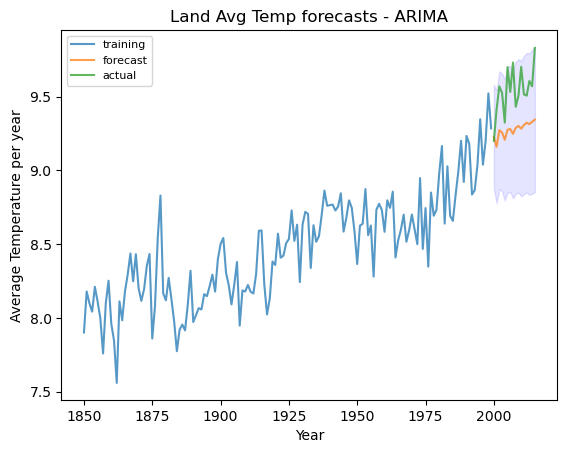

In [35]:
# Forecast
preds_2000, conf_int_2000 = model_2000.predict(n_periods=test_2000.shape[0], return_conf_int=True)

# plot the prediction and the actual test values
plot_all(train_2000, test_2000, preds_2000, conf_int_2000)

In [36]:
#Calculate the mean absolute percentage
mape_2000 = mape(test_2000, preds_2000)
mape_2000 #print mape as an accuracy percentage

0.027959748802817652

In [37]:
# Calculate the root mean squared error
rmse_2000 = rmse(test_2000,preds_2000)
rmse_2000

0.2969982752328913

The actual values lie inside the confidence interval of the predictions but the actual predictions seem to under predict the actual values.

### Comparing Models

In [43]:
# Creating table of cut-offs, MAPE and RMSE
from tabulate import tabulate
data_table = [["1966(70%)", mape_70, rmse_70, model.aic()], 
        ["1950", mape_1950, rmse_1950, model_1950.aic()], 
        ["2000", mape_2000,rmse_2000, model_2000.aic()]]
cols= ['Cut-offs', 'MAPE', 'RMSE', 'AIC']

print(tabulate(data_table,headers = cols))

Cut-offs         MAPE      RMSE       AIC
----------  ---------  --------  --------
1966(70%)   0.0334728  0.385984  -60.8682
1950        0.0270602  0.290702  -50.5166
2000        0.0279597  0.296998  -70.2369


In [64]:
print('ARIMA model orders')
print('1966(70%)',model.order)
print('1950     ',model_1950.order)
print('2000     ',model_2000.order)

ARIMA model orders
1966(70%) (1, 1, 3)
1950      (0, 1, 4)
2000      (2, 1, 3)


# Conclusions

I use global land temperature historical data to predict future data. The original data ranges from 1750 to 2015 in month intervals. I averaged the temperatures over the years and eliminated data earlier than 1850 due to the large uncertainties. Then I used auto_arima to find the parameters (p and q) of the model which gives the lowest level of AIC values. I divided the data into train and test sets with a cut-off of 70%. The model seemed to under repressent the actual values. I then used differend cut-offs to test if the predictions improve. The cut-off selected were 1950 and 2000. In terms of the MAPE and RMSE both models seem to do better. They are even similar. But, in terms of the AIC, the model with the 1950 cut-off does worst than the model with 70% cut-off and the model with 2000 cut-off does better. 

I propose to use the model with 2000 cut-off to predict future land global temperatures.